# Controlling figure aesthetics

- Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in.
- Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

- Let’s define a simple function to plot some offset sine waves, which will help us see the different stylistic parameters we can tweak.

In [3]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)

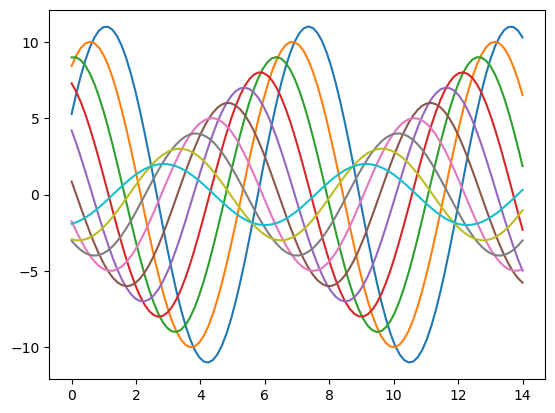

In [4]:
sinplot()

## Seaborn figure styles
- There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks

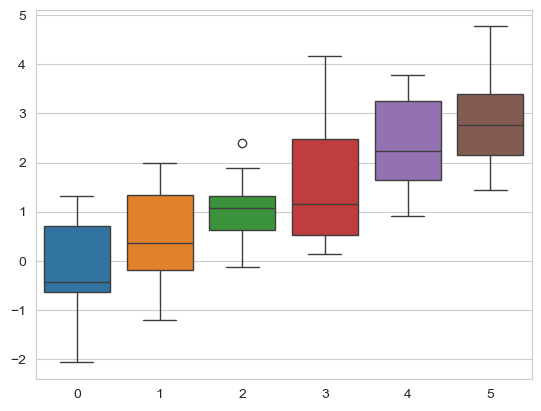

In [5]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

## Removing axes spines
- Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. The seaborn function despine() can be called to remove them:

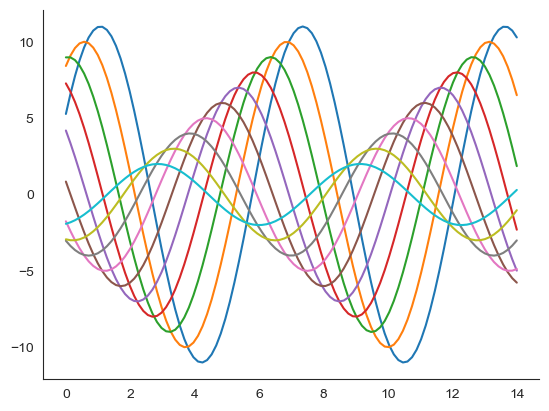

In [8]:
sinplot()
sns.despine()

- Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

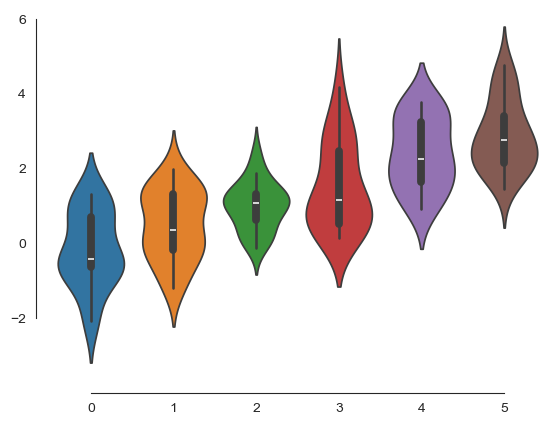

In [9]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

- you can also control which spines are removed with additional arguments to despine():

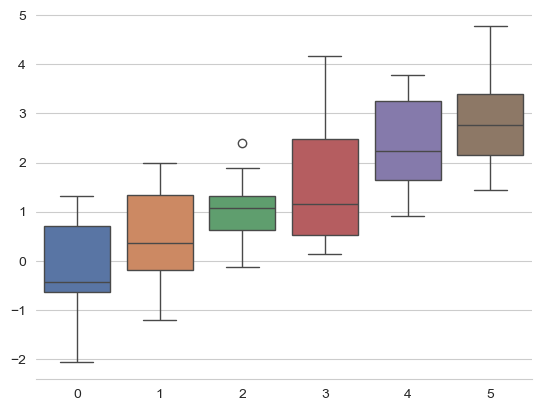

In [10]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

## Temporarily setting figure style
- Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

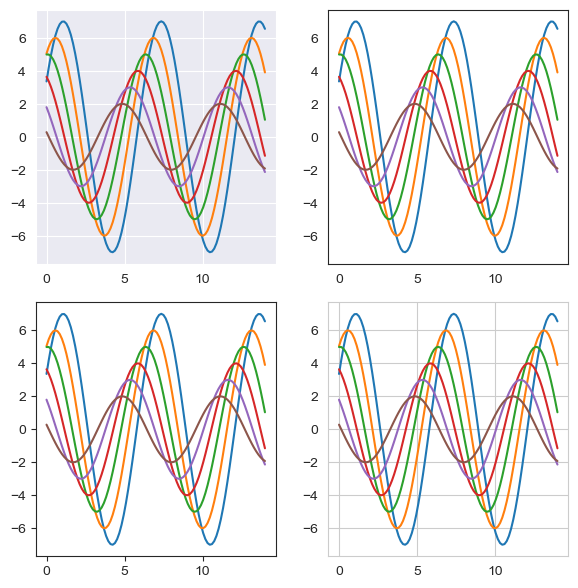

In [11]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot(6)

with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot(6)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot(6)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot(6)

f.tight_layout()